In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('s7_data_sample_rev4_50k1.csv', sep=';')
data

,ISSUE_DATE,FLIGHT_DATE_LOC,PAX_TYPE,REVENUE_AMOUNT,FOP_TYPE_CODE,ORIG_CITY_CODE,DEST_CITY_CODE,ROUTE_FLIGHT_TYPE,FFP_FLAG,SALE_TYPE
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,CA,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31 00:00:00,2022-01-03 00:00:00,AD,610,CA,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28 00:00:00,2022-01-04 00:00:00,AD,390,CA.FS.IN,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08 00:00:00,2022-01-05 00:00:00,AD,190,CA,VOZ,MOW,ВВЛ,NaN,ONLINE
4,2021-12-08 00:00:00,2022-01-12 00:00:00,AD,190,CA,MOW,KRR,ВВЛ,FFP,OFFLINE
...,...,...,...,...,...,...,...,...,...,...
49995,2022-06-11 00:00:00,2022-06-22 00:00:00,CHD,480,CA,MOW,OMS,ВВЛ,NaN,ONLINE
49996,2022-06-06 00:00:00,2022-06-20 00:00:00,AD,270,CA,LED,MOW,ВВЛ,NaN,OFFLINE
49997,2022-06-26 00:00:00,2022-06-29 00:00:00,AD,230,CA.FS.IN,MOW,KZN,ВВЛ,FFP,ONLINE
49998,2022-06-26 00:00:00,2022-06-28 00:00:00,AD,270,CA,KZN,MOW,ВВЛ,NaN,OFFLINE


ISSUE_DATE дата покупки
FLIGHT_DATE_LOC дата совершения перелета
PAX_TYPE тип пассажиров
REVENUE_AMOUNT сумма
FOP_TYPE_CODE использованные способы оплаты
ORIG_CITY_CODE код аэропорта отправления
DEST_CITY_CODE код аэропорта назначения
ROUTE_FLIGHT_TYPE тип перелета
FFP_FLAG наличие программы лояльности
SALE_TYPE способ покупки

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ISSUE_DATE         50000 non-null  object
 1   FLIGHT_DATE_LOC    50000 non-null  object
 2   PAX_TYPE           50000 non-null  object
 3   REVENUE_AMOUNT     50000 non-null  int64 
 4   FOP_TYPE_CODE      50000 non-null  object
 5   ORIG_CITY_CODE     49998 non-null  object
 6   DEST_CITY_CODE     49999 non-null  object
 7   ROUTE_FLIGHT_TYPE  50000 non-null  object
 8   FFP_FLAG           19398 non-null  object
 9   SALE_TYPE          50000 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.8+ MB


In [5]:
data.describe()

,REVENUE_AMOUNT
count,50000.000000
mean,433.718600
std,217.933916
min,0.000000
25%,280.000000
50%,400.000000
75%,550.000000
max,5200.000000


In [6]:
ROUTE_FLIGHT_TYPE = data.groupby('ROUTE_FLIGHT_TYPE').size().reset_index(name='count')
print (ROUTE_FLIGHT_TYPE)

  ROUTE_FLIGHT_TYPE  count
0               ВВЛ  46062
1               МВЛ   3938


Text(0.5, 1.0, 'кол-во перелетов по направлению')

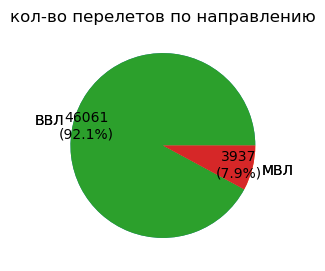

In [7]:
plt.figure(figsize=(3,3))   #создаем фигуру определенного размера
def func(pct, allvalues): 
    absolute = int(pct/100.*sum(allvalues)) 
    return "{:d}\n({:.1f}%)".format(absolute, pct)
plt.pie(ROUTE_FLIGHT_TYPE['count'], labels=ROUTE_FLIGHT_TYPE['ROUTE_FLIGHT_TYPE'], autopct=lambda pct: func(pct, ROUTE_FLIGHT_TYPE['count']), pctdistance=0.85)
plt.pie(ROUTE_FLIGHT_TYPE['count'], labels=ROUTE_FLIGHT_TYPE['ROUTE_FLIGHT_TYPE'])
plt.title('кол-во перелетов по направлению')

In [8]:
SALE_TYPE = data.groupby('SALE_TYPE').size().reset_index(name='count')
SALE_TYPE

,SALE_TYPE,count
0,OFFLINE,21942
1,ONLINE,28058


Text(0.5, 1.0, 'способ покупки билетов')

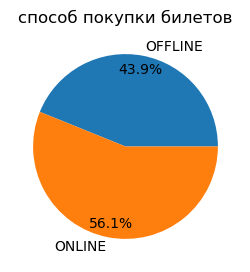

In [9]:
plt.figure(figsize=(3,3))   #создаем фигуру определенного размера
plt.pie(SALE_TYPE['count'], labels=SALE_TYPE['SALE_TYPE'], autopct='%1.1f%%', pctdistance=0.85)
plt.title('способ покупки билетов')

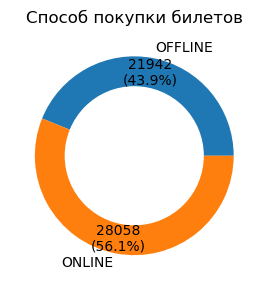

In [10]:
plt.figure(figsize=(3, 3))
def func(pct, allvalues): 
    absolute = int(pct/100.*sum(allvalues)) 
    return "{:d}\n({:.1f}%)".format(absolute, pct)
plt.pie(SALE_TYPE['count'], labels=SALE_TYPE['SALE_TYPE'], autopct=lambda pct: func(pct, SALE_TYPE['count']), pctdistance=0.85)
plt.title('Способ покупки билетов') 
# Добавление окружности в центр для создания вида пончика 
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf() 
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

In [14]:
import calendar
data['ISSUE_DATE'] = pd.to_datetime(data['ISSUE_DATE'])
data['MONTH'] = data['ISSUE_DATE'].dt.month 
monthly_revenue = data.groupby('MONTH')['REVENUE_AMOUNT'].sum().reset_index() 
monthly_revenue['MONTH'] = monthly_revenue['MONTH'].apply(lambda x: calendar.month_name[x])
monthly_revenue

,MONTH,REVENUE_AMOUNT
0,January,1363860
1,February,1355100
2,March,1833890
3,April,2040720
4,May,1715090
5,June,1616250
6,July,2643660
7,August,2479450
8,September,1678230
9,October,1334610


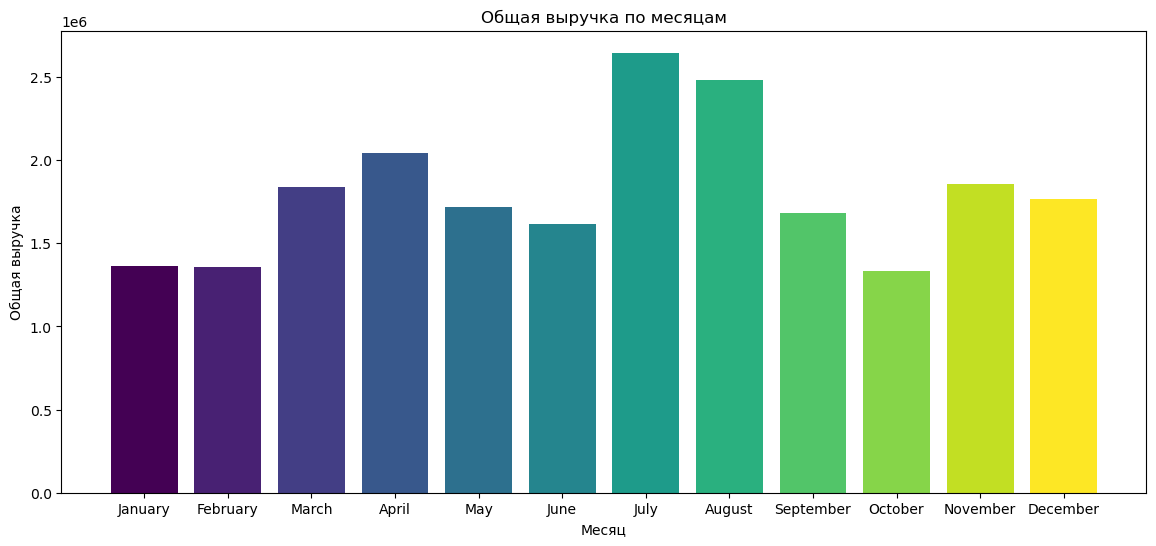

In [13]:
import calendar
# Преобразование столбца ISSUE_DATE в тип datetime и извлечение месяца 
data['ISSUE_DATE'] = pd.to_datetime(data['ISSUE_DATE'])
data['MONTH'] = data['ISSUE_DATE'].dt.month 
# Группировка по месяцам и подсчет общей суммы REVENUE_AMOUNT
monthly_revenue = data.groupby('MONTH')['REVENUE_AMOUNT'].sum().reset_index() 
# Получение названий месяцев
monthly_revenue['MONTH'] = monthly_revenue['MONTH'].apply(lambda x: calendar.month_name[x])
# Цветовая палитра для столбцов
colors = plt.cm.viridis(np.linspace(0, 1, len(monthly_revenue)))
# Построение гистограммы 
plt.figure(figsize=(14, 6))
plt.bar(monthly_revenue['MONTH'], monthly_revenue['REVENUE_AMOUNT'], color=colors)
plt.xlabel('Месяц')
plt.ylabel('Общая выручка') 
plt.title('Общая выручка по месяцам')
plt.xticks(monthly_revenue['MONTH']) 
plt.show()

In [47]:
data['ISSUE_DATE'] = pd.to_datetime(data['ISSUE_DATE']) 
data['MONTH'] = data['ISSUE_DATE'].dt.month
# Группировка по месяцам и подсчет количества заказов 
monthly_orders = data.groupby('MONTH').size().reset_index(name='COUNT')
# Получение названий месяцев 
monthly_orders['MONTH'] = monthly_orders['MONTH'].apply(lambda x: calendar.month_name[x]) 
# Вывод результата 
print(monthly_orders)

        MONTH  COUNT
0     January   3644
1    February   3504
2       March   4378
3       April   4018
4         May   3673
5        June   3389
6        July   5325
7      August   4850
8   September   3700
9     October   3651
10   November   5235
11   December   4633


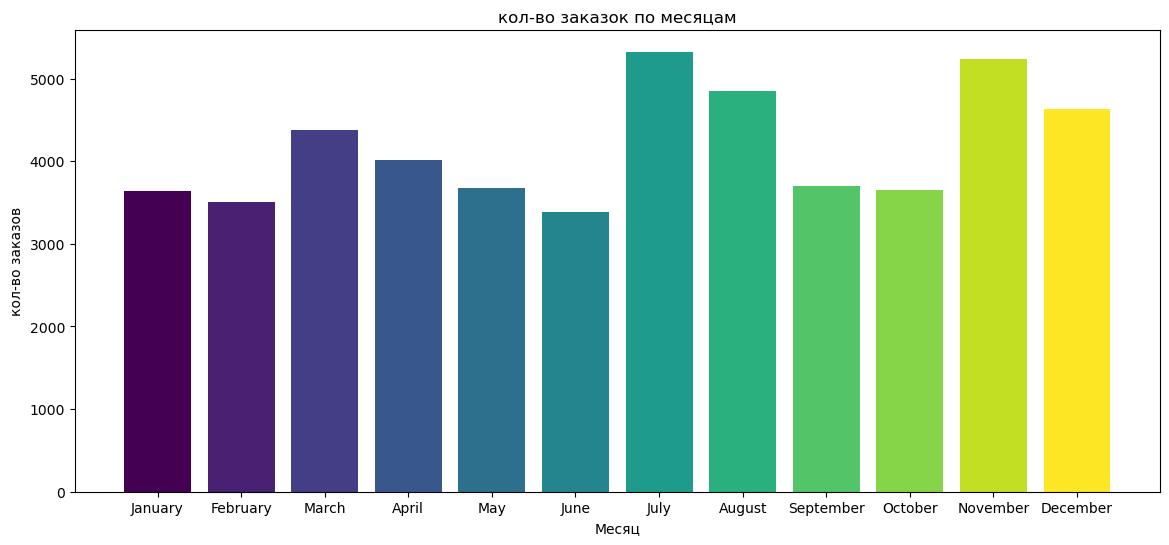

In [69]:

plt.figure(figsize=(14,6))
colors = plt.cm.viridis(np.linspace(0, 1, len(monthly_orders)))
plt.bar(monthly_orders['MONTH'], monthly_orders['COUNT'], color=colors)

# Построение гистограммы 
plt.xlabel('Месяц')
plt.ylabel('кол-во заказов') 
plt.title('кол-во заказок по месяцам')
plt.xticks(monthly_orders['MONTH']) 
plt.show()

In [65]:
data['ISSUE_DATE'] = pd.to_datetime(data['ISSUE_DATE'])
data['YEAR'] = data['ISSUE_DATE'].dt.year
YearOrders = data.groupby('YEAR').size().reset_index(name='COUNT')
print(YearOrders)

   YEAR  COUNT
0  2021  13519
1  2022  36481


In [58]:
data

,ISSUE_DATE,FLIGHT_DATE_LOC,PAX_TYPE,REVENUE_AMOUNT,FOP_TYPE_CODE,ORIG_CITY_CODE,DEST_CITY_CODE,ROUTE_FLIGHT_TYPE,FFP_FLAG,SALE_TYPE,MONTH,YEAR
0,2021-12-07,2022-01-11 00:00:00,AD,200,CA,MOW,KGD,ВВЛ,NaN,ONLINE,12,2021
1,2021-12-31,2022-01-03 00:00:00,AD,610,CA,UUS,OVB,ВВЛ,NaN,OFFLINE,12,2021
2,2021-11-28,2022-01-04 00:00:00,AD,390,CA.FS.IN,KGD,MOW,ВВЛ,FFP,ONLINE,11,2021
3,2021-12-08,2022-01-05 00:00:00,AD,190,CA,VOZ,MOW,ВВЛ,NaN,ONLINE,12,2021
4,2021-12-08,2022-01-12 00:00:00,AD,190,CA,MOW,KRR,ВВЛ,FFP,OFFLINE,12,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22 00:00:00,CHD,480,CA,MOW,OMS,ВВЛ,NaN,ONLINE,6,2022
49996,2022-06-06,2022-06-20 00:00:00,AD,270,CA,LED,MOW,ВВЛ,NaN,OFFLINE,6,2022
49997,2022-06-26,2022-06-29 00:00:00,AD,230,CA.FS.IN,MOW,KZN,ВВЛ,FFP,ONLINE,6,2022
49998,2022-06-26,2022-06-28 00:00:00,AD,270,CA,KZN,MOW,ВВЛ,NaN,OFFLINE,6,2022


In [67]:
data['FLIGHT_DATE_LOC'] = pd.to_datetime(data['FLIGHT_DATE_LOC'])
data['MONTH'] = data['FLIGHT_DATE_LOC'].dt.month

MonthFlight = data.groupby('MONTH').size().reset_index(name='COUNT')
MonthFlight['MONTH'] = MonthFlight['MONTH'].apply(lambda x: calendar.month_name[x]) 
MonthFlight

,MONTH,COUNT
0,January,5207
1,February,2293
2,March,3679
3,April,4257
4,May,2487
5,June,3593
6,July,4653
7,August,6898
8,September,5703
9,October,2388


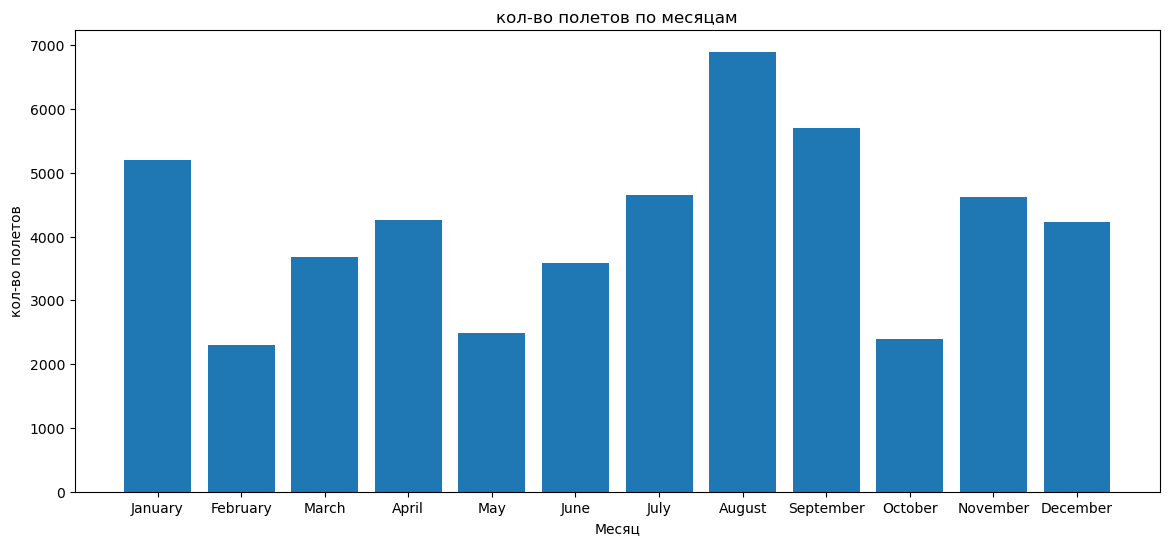

In [70]:
plt.figure(figsize=(14,6))
plt.bar(MonthFlight['MONTH'], MonthFlight['COUNT'])
plt.xlabel('Месяц')
plt.ylabel('кол-во полетов') 
plt.title('кол-во полетов по месяцам')
plt.xticks(monthly_orders['MONTH']) 
plt.show()